# Mini Project #2
## Investigating Netflix Movies

##### Netflix, which started in 1997 as a DVD rental service, has become into one of the largest entertainment and media companies.


### ***Part 1 - Explore the data from 1990s***

#### Objective:

##### Perform exploratory data analysis to better understand the 1990's decade, in order to find the nostalgic styles movies for a production company.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

#### Load the dataset into a Pandas DataFrame

In [2]:
# Load the dataset into a Pandas DataFrame
netflix = pd.read_csv("netflix_data.csv")

In [3]:
# Display the column names of the DataFrame
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

#### *Exploratory Data Analysis - Data from 1990s decade*

In [10]:
# Filter the shows from 1990s decade
netflix_90 = netflix[(netflix["release_year"] >= 1990) & (netflix["release_year"] <= 1999)]

In [11]:
# Select the index as show_id
netflix_90 = netflix_90.set_index("show_id")

In [12]:
# Explore the first rows of the filtered data
netflix_90.head()

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


In [13]:
# Display the summary statistics of the DataFrame
netflix_90.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, s8 to s7695
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          225 non-null    object
 1   title         225 non-null    object
 2   director      192 non-null    object
 3   cast          221 non-null    object
 4   country       216 non-null    object
 5   date_added    225 non-null    object
 6   release_year  225 non-null    int64 
 7   duration      225 non-null    int64 
 8   description   225 non-null    object
 9   genre         225 non-null    object
dtypes: int64(2), object(8)
memory usage: 19.3+ KB


#### Count the shows by type

In [15]:
# Number of shows by type in 90's decade
netflix_90.groupby("type")["title"].count()

type
Movie      194
TV Show     31
Name: title, dtype: int64

#### Count the shows by type and release year

In [17]:
# Shows by Release year and Type in the 90's decade
netflix_90.groupby(["type","release_year"])[["title"]].count()

title
type    release_year       
Movie   1990             17
        1991             16
        1992             16
        1993             18
        1994             15
        1995             17
        1996             16
        1997             26
        1998             27
        1999             26
TV Show 1990              3
        1991              1
        1992              2
        1993              4
        1994              1
        1995              2
        1996              3
        1997              4
        1998              4
        1999              7

#### Count the shows by Genre and Type

In [19]:
# Number of shows by Genre and Type in 90's decade
netflix_90.groupby(["type", "genre"])[["title"]].count()

title
type    genre                  
Movie   Action               50
        Children             15
        Classic Movies       17
        Comedies             44
        Cult Movies           2
        Documentaries         4
        Dramas               44
        Horror Movies         4
        Stand-Up              9
        Thrillers             5
TV Show Anime Series          3
        British TV            2
        Classic               3
        Crime TV              1
        Docuseries            2
        International TV      1
        Kids                 11
        Reality TV            1
        TV Action             2
        TV Comedies           2
        TV Dramas             1
        TV Shows              2

#### Filter the movies from 90's

In [21]:
# Movies by genre in the 90's decade
netflix_90_movies = netflix_90[netflix_90["type"] == "Movie"]

#### Count the number of Movies by genre

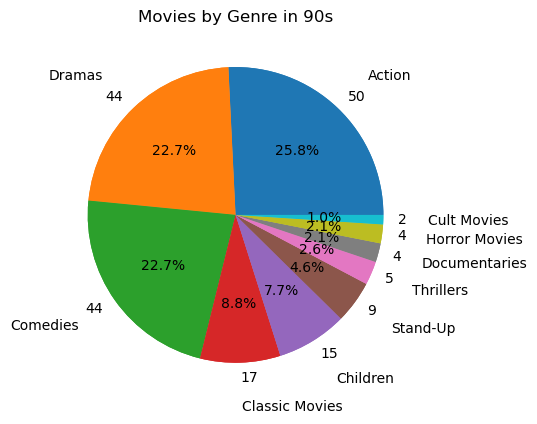

In [23]:
# Number of Movies by genre in the 90's decade
genre_count = netflix_90_movies["genre"].value_counts()
plt.pie(genre_count, labels=genre_count.index, autopct='%1.1f%%', labeldistance=1.3)
plt.pie(genre_count, labels=genre_count.values)
plt.title("Movies by Genre in 90s")
plt.show()

#### Exploring the duration of the shows in 90's

In [25]:
# Summary of the duration from the shows in the 90's decade
netflix_90.groupby("type")[["duration"]].agg(["max","min","mean"])

duration                
             max min        mean
type                            
Movie        204  28  113.917526
TV Show       11   1    2.903226

#### Short movies by Genre (<90 minutes)

In [27]:
# Number of Short Movies by Genre (considered short if it is less than 90 minutes)
short_movie = netflix_90_movies[netflix_90_movies["duration"] < 90]
short_movie_count = short_movie["genre"].value_counts()

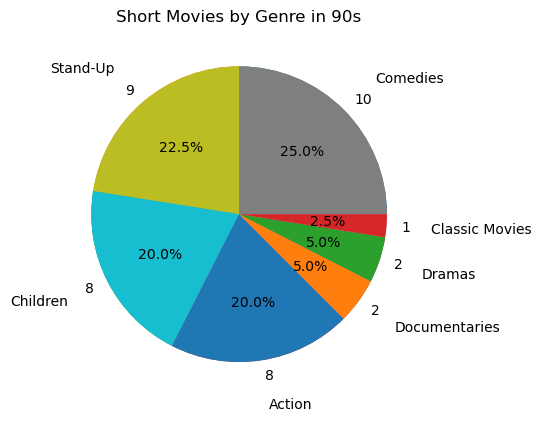

In [28]:
# Plot the number of Short Movies by Genre (considered short if it is less than 90 minutes)
fig1 = plt.figure()
plt.pie(short_movie_count, labels=short_movie_count.index, autopct='%1.1f%%', labeldistance=1.3)
plt.pie(short_movie_count, labels=short_movie_count.values)
plt.title("Short Movies by Genre in 90s")
plt.show()

#### Find the count of short Action movies

In [30]:
# Find the count of Short action movies
short_movie_action = short_movie[short_movie["genre"] == "Action"]
short_movie_act_count = short_movie_action.shape[0]
short_movie_act_count

8

#### Duration of movies in 90's

In [32]:
# Duration of movies in the 90's decade
duration_movies = netflix_90_movies.groupby(["duration"])[["type"]].size().reset_index(name="count")
duration_movies.sort_values(by="count", ascending=False)

,duration,count
27,94,8
34,101,6
41,108,5
29,96,5
28,95,5
...,...,...
56,125,1
58,127,1
61,131,1
63,135,1


#### Distribution of movies by duration, in the 90's

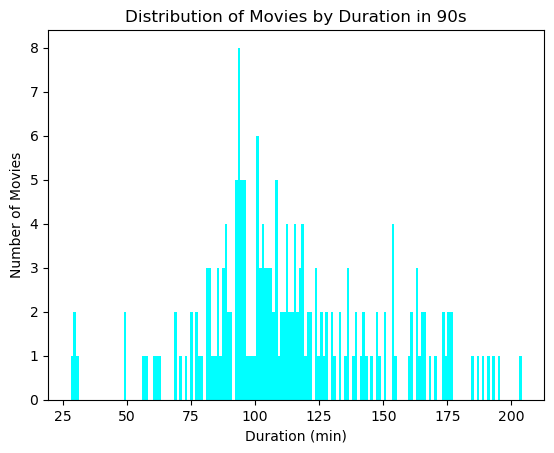

In [34]:
# Distribution of Movies by duration in minutes
fig2 = plt.figure()
plt.hist(netflix_90_movies["duration"], bins=170, color="cyan")
plt.xlabel("Duration (min)")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movies by Duration in 90s")
plt.show()

#### Finding the most repeated movie duration

In [36]:
# Finding the most repited movie duration
max_duration_movies = duration_movies.loc[duration_movies["count"].idxmax()]
max_duration_movies

duration    94
count        8
Name: 27, dtype: int64

#### *Results from exploratory data analysis*

***What was the most frequent movie duration in the 1990s?*** 94 min, in 8 movies

***Count the number of short action movies released in the 1990s:*** 8 movies

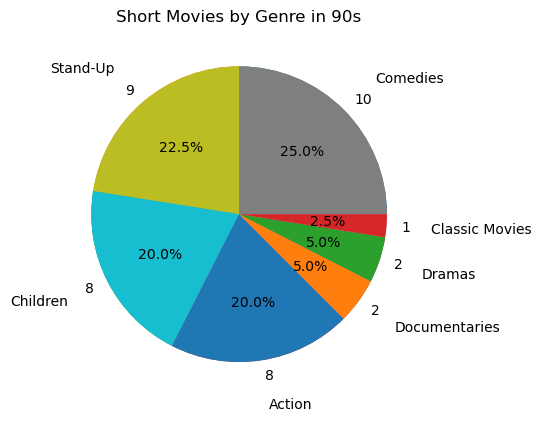

In [40]:
fig1

### ***Part 2 - Average duration of movies on Netflix during the years***

#### Objective:

##### To determine whether the average duration of movies on Netflix has been declining over the years.

#### Load the dataset into a Pandas DataFrame

In [44]:
# Import the cleaned data
netflix_c = pd.read_csv("netflix_data_clean.csv", sep=";")

#### Exploratory Data Analysis - Data cleaned Overall

In [46]:
# Display the summary statistics of the DataFrame
netflix_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7786 entries, 0 to 7785
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7786 non-null   object
 1   type          7786 non-null   object
 2   title         7786 non-null   object
 3   director      5397 non-null   object
 4   cast          7069 non-null   object
 5   country       7279 non-null   object
 6   date_added    7776 non-null   object
 7   release_year  7786 non-null   int64 
 8   duration      7786 non-null   int64 
 9   description   7786 non-null   object
 10  genre         7786 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.2+ KB


#### Summary from the duration of the shows

In [48]:
# Summary of the duration from the shows in the dataframe
netflix_c.groupby("type")[["duration"]].agg(["max","min","median"])

duration           
             max min median
type                       
Movie        312   3   98.0
TV Show       16   1    1.0

#### Exploring the number of shows released by year

In [50]:
# Number of shows by release year
netflix_c.groupby("type")[["release_year"]].value_counts()

type     release_year
Movie    2017            744
         2018            734
         2016            642
         2019            582
         2020            411
                        ... 
TV Show  1981              1
         1985              1
         1989              1
         1991              1
         1994              1
Name: count, Length: 118, dtype: int64

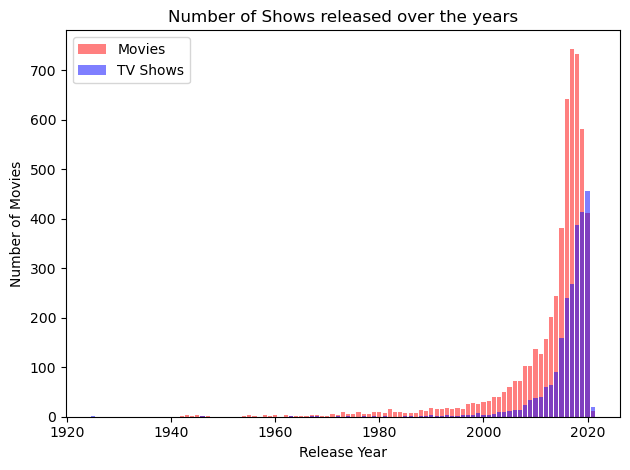

In [51]:
# Number of shows by Type by year
movies = netflix_c[netflix_c["type"] == "Movie"]
tv_show = netflix_c[netflix_c["type"] == "TV Show"]
movie_count = movies["release_year"].value_counts().sort_index()
tv_show_count = tv_show["release_year"].value_counts().sort_index()

# plot the count
plt.bar(movie_count.index, movie_count.values,color="red", label="Movies", alpha=0.5)
plt.bar(tv_show_count.index, tv_show_count.values,color="blue", label="TV Shows", alpha=0.5)
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Number of Shows released over the years")
plt.tight_layout()
plt.legend()
plt.show()

#### Average duration of movies by Genre and release year (Overall)

In [53]:
# Number of movies by Genre and Average duration by year exploration
netflix_c.groupby(["genre", "release_year"])[["duration"]].mean().round(2)

duration
genre         release_year          
Action        1956             98.00
              1960            154.00
              1962            185.00
              1963            194.00
              1967            111.00
...                              ...
Uncategorized 2016             34.67
              2017             60.00
              2018             48.67
              2019             50.33
              2020             41.50

[641 rows x 1 columns]

#### Average duration of movies by release year

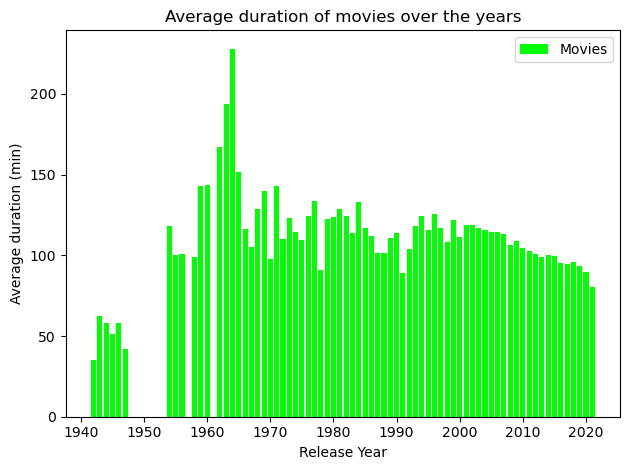

In [55]:
# Average duration of movies by release year
movies_duration = movies.groupby("release_year")["duration"].mean().sort_index()

# plot the count as BAR
plt.bar(movies_duration.index, movies_duration.values, color="lime", label="Movies")
plt.xlabel("Release Year")
plt.ylabel("Average duration (min)")
plt.title("Average duration of movies over the years")
plt.tight_layout()
plt.legend()
plt.show()

#### Finding a Trend Line

In [57]:
# Import numpy
import numpy as np

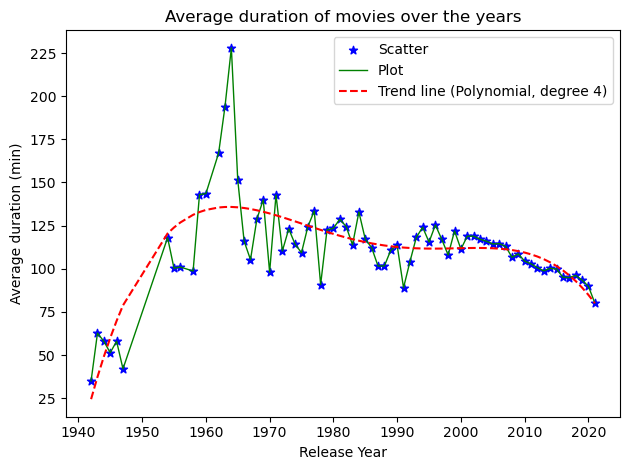

In [58]:
# Average duration of movies over the years
plt.scatter(movies_duration.index, movies_duration.values, color="blue", marker="*", label="Scatter")
plt.plot(movies_duration.index, movies_duration.values,color="green", label="Plot", linewidth=1)
# calculate the trendline
x = movies_duration.index
y = movies_duration.values
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", label="Trend line (Polynomial, degree 4)")
# plot additionals
plt.xlabel("Release Year")
plt.ylabel("Average duration (min)")
plt.title("Average duration of movies over the years")
plt.tight_layout()
plt.legend()
plt.show()

#### Finding a Proyection Line

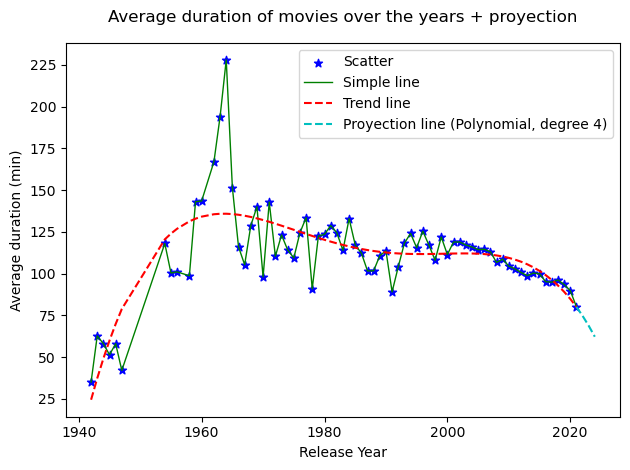

In [60]:
# Projection of the incoming years for the Average duration of movies 
fig3 = plt.figure()
plt.scatter(movies_duration.index, movies_duration.values, color="blue", marker="*", label="Scatter")
plt.plot(movies_duration.index, movies_duration.values,color="green", label="Simple line", linewidth=1)
plt.plot(x,p(x),"r--", label="Trend line")
# calculate the proyection
x_future = np.arange(x.max(), 2025)
plt.plot(x_future, p(x_future), "c--", label="Proyection line (Polynomial, degree 4)")
# plot additionals
plt.xlabel("Release Year")
plt.ylabel("Average duration (min)")
plt.title("Average duration of movies over the years + proyection", pad=15)
plt.tight_layout()
plt.legend()
plt.show()

#### Average duration of movies by Genre (Overall)

In [62]:
# Average duration by genre
mov_dur_gen = movies.groupby(["genre"])["duration"].mean().round(2)
mov_dur_gen

genre
Action                  113.28
Anime Features           93.37
Children                 78.09
Classic Movies          113.38
Comedies                107.22
Cult Movies             100.50
Documentaries            81.88
Dramas                  111.80
Horror Movies            97.40
Independent Movies       98.70
International Movies    109.46
LGBTQ Movies             99.00
Music                    91.12
Romantic Movies          83.33
Sci-Fi                  108.09
Sports Movies            87.00
Stand-Up                 66.61
Thrillers                97.24
Uncategorized            46.67
Name: duration, dtype: float64

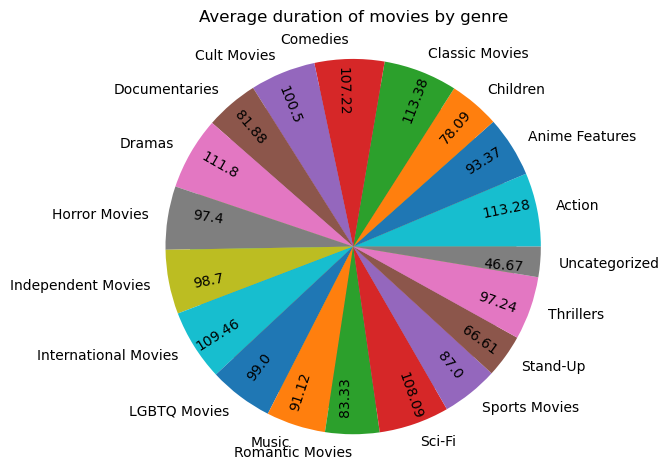

In [63]:
# Average duration by genre
plt.pie(mov_dur_gen, labels=mov_dur_gen.values, labeldistance=0.8, rotatelabels =True)
plt.pie(mov_dur_gen, labels=mov_dur_gen.index, radius=1.15)
plt.title("Average duration of movies by genre", pad=15)
plt.tight_layout()
plt.show()

#### Average duration of movies for each Genre

In [65]:
# Average duration over the years for each genre
Action = movies[movies["genre"] == "Action"].groupby("release_year")["duration"].mean().sort_index()
Anime = movies[movies["genre"] == "Anime Features"].groupby("release_year")["duration"].mean().sort_index()
Children = movies[movies["genre"] == "Children"].groupby("release_year")["duration"].mean().sort_index()
Classic = movies[movies["genre"] == "Classic Movies"].groupby("release_year")["duration"].mean().sort_index()
Comedies = movies[movies["genre"] == "Comedies"].groupby("release_year")["duration"].mean().sort_index()
Cult = movies[movies["genre"] == "Cult Movies"].groupby("release_year")["duration"].mean().sort_index()
Doc = movies[movies["genre"] == "Documentaries"].groupby("release_year")["duration"].mean().sort_index()
Dramas = movies[movies["genre"] == "Dramas"].groupby("release_year")["duration"].mean().sort_index()
Horror = movies[movies["genre"] == "Horror Movies"].groupby("release_year")["duration"].mean().sort_index()
Indep = movies[movies["genre"] == "Independent Movies"].groupby("release_year")["duration"].mean().sort_index()
Inter = movies[movies["genre"] == "International Movies"].groupby("release_year")["duration"].mean().sort_index()
LGBTQ = movies[movies["genre"] == "LGBTQ Movies"].groupby("release_year")["duration"].mean().sort_index()
Music = movies[movies["genre"] == "Music"].groupby("release_year")["duration"].mean().sort_index()
Romantic = movies[movies["genre"] == "Romantic Movies"].groupby("release_year")["duration"].mean().sort_index()
SciFi = movies[movies["genre"] == "Sci-Fi"].groupby("release_year")["duration"].mean().sort_index()
Sports = movies[movies["genre"] == "Sports Movies"].groupby("release_year")["duration"].mean().sort_index()
Stand = movies[movies["genre"] == "Stand-Up"].groupby("release_year")["duration"].mean().sort_index()
Thrillers = movies[movies["genre"] == "Thrillers"].groupby("release_year")["duration"].mean().sort_index()
other = movies[movies["genre"] == "Uncategorized"].groupby("release_year")["duration"].mean().sort_index()

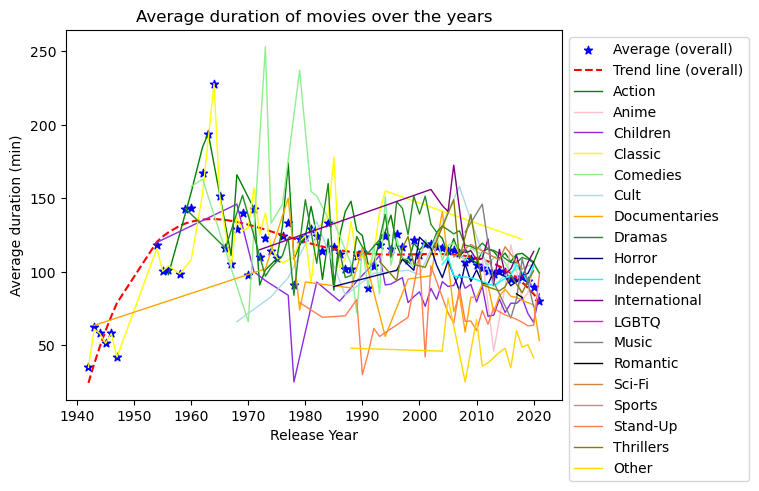

In [66]:
# Graph: Average duration of movies over the years by genre
fig4 = plt.figure()
plt.scatter(movies_duration.index, movies_duration.values, color="blue", marker="*", label="Average (overall)")
plt.plot(x,p(x),"r--", label="Trend line (overall)")
plt.plot(Action.index, Action.values,color="green", label="Action", linewidth=1)
plt.plot(Anime.index, Anime.values,color="pink", label="Anime", linewidth=1)
plt.plot(Children.index, Children.values,color="blueviolet", label="Children", linewidth=1)
plt.plot(Classic.index, Classic.values,color="yellow", label="Classic", linewidth=1)
plt.plot(Comedies.index, Comedies.values,color="lightgreen", label="Comedies", linewidth=1)
plt.plot(Cult.index, Cult.values,color="lightblue", label="Cult", linewidth=1)
plt.plot(Doc.index, Doc.values,color="orange", label="Documentaries", linewidth=1)
plt.plot(Dramas.index, Dramas.values,color="forestgreen", label="Dramas", linewidth=1)
plt.plot(Horror.index, Horror.values,color="navy", label="Horror", linewidth=1)
plt.plot(Indep.index, Indep.values,color="cyan", label="Independent", linewidth=1)
plt.plot(Inter.index, Inter.values,color="purple", label="International", linewidth=1)
plt.plot(LGBTQ.index, LGBTQ.values,color="magenta", label="LGBTQ", linewidth=1)
plt.plot(Music.index, Music.values,color="grey", label="Music", linewidth=1)
plt.plot(Romantic.index, Romantic.values,color="black", label="Romantic", linewidth=1)
plt.plot(SciFi.index, SciFi.values,color="peru", label="Sci-Fi", linewidth=1)
plt.plot(Sports.index, Sports.values,color="rosybrown", label="Sports", linewidth=1)
plt.plot(Stand.index, Stand.values,color="coral", label="Stand-Up", linewidth=1)
plt.plot(Thrillers.index, Thrillers.values,color="olive", label="Thrillers", linewidth=1)
plt.plot(other.index, other.values,color="gold", label="Other", linewidth=1)
# plot additionals
plt.xlabel("Release Year")
plt.ylabel("Average duration (min)")
plt.title("Average duration of movies over the years")
#plt.tight_layout()
plt.legend(bbox_to_anchor=(1,1))
plt.show()

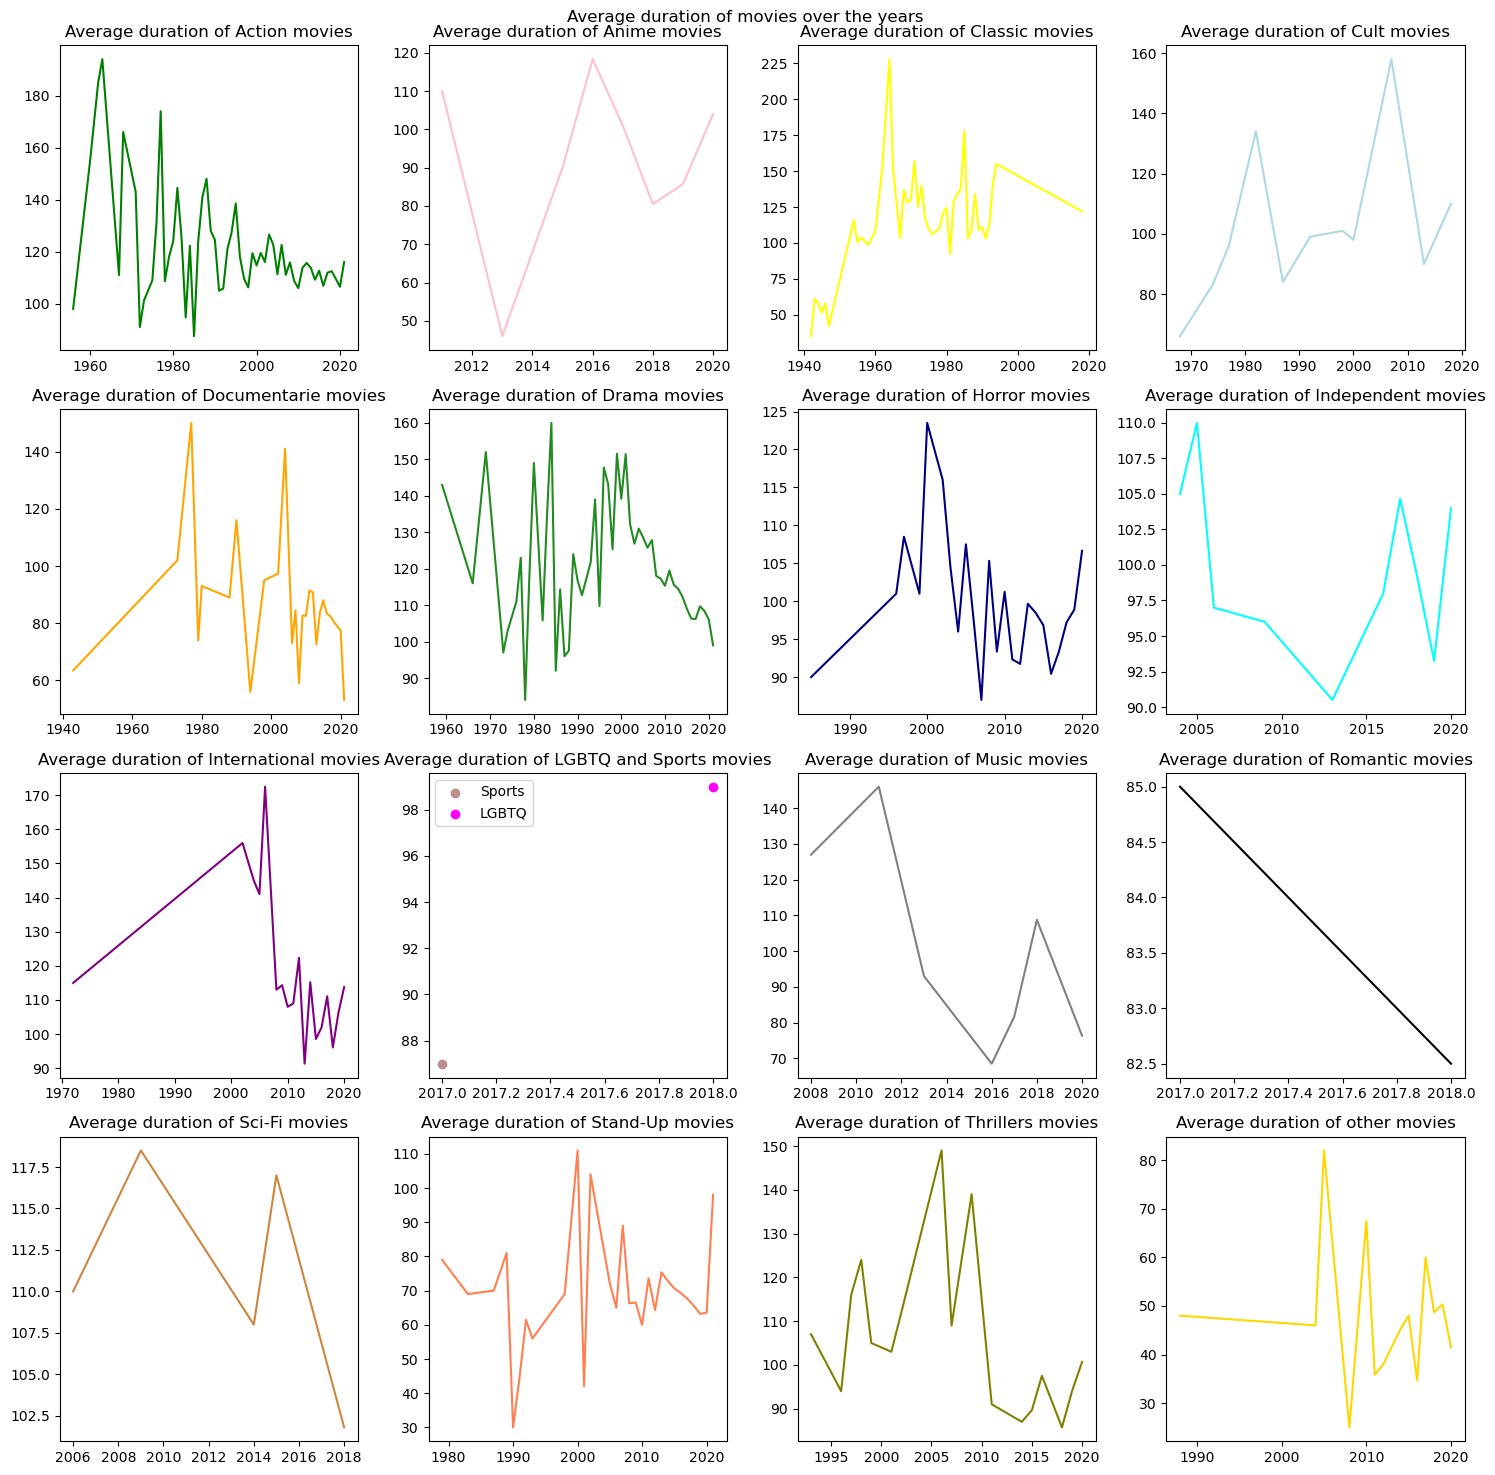

In [67]:
# Individual Graph: Average duration of movies over the years by genre
fig5, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
fig5.suptitle("Average duration of movies over the years")

axes[0,0].plot(Action.index, Action.values,color="green", label="Action")
axes[0,0].set_title("Average duration of Action movies")

axes[0,1].plot(Anime.index, Anime.values,color="pink", label="Anime")
axes[0,1].set_title("Average duration of Anime movies")

axes[0,2].plot(Classic.index, Classic.values,color="yellow", label="Classic")
axes[0,2].set_title("Average duration of Classic movies")

axes[0,3].plot(Cult.index, Cult.values,color="lightblue", label="Cult")
axes[0,3].set_title("Average duration of Cult movies")

axes[1,0].plot(Doc.index, Doc.values,color="orange", label="Documentaries")
axes[1,0].set_title("Average duration of Documentarie movies")

axes[1,1].plot(Dramas.index, Dramas.values,color="forestgreen", label="Dramas")
axes[1,1].set_title("Average duration of Drama movies")

axes[1,2].plot(Horror.index, Horror.values,color="navy", label="Horror")
axes[1,2].set_title("Average duration of Horror movies")

axes[1,3].plot(Indep.index, Indep.values,color="cyan", label="Independent")
axes[1,3].set_title("Average duration of Independent movies")

axes[2,0].plot(Inter.index, Inter.values,color="purple", label="International")
axes[2,0].set_title("Average duration of International movies")

axes[2,1].scatter(Sports.index, Sports.values,color="rosybrown", label="Sports")
axes[2,1].scatter(LGBTQ.index, LGBTQ.values,color="magenta", label="LGBTQ")
axes[2,1].set_title("Average duration of LGBTQ and Sports movies")
axes[2,1].legend()

axes[2,2].plot(Music.index, Music.values,color="grey", label="Music")
axes[2,2].set_title("Average duration of Music movies")

axes[2,3].plot(Romantic.index, Romantic.values,color="black", label="Romantic")
axes[2,3].set_title("Average duration of Romantic movies")

axes[3,0].plot(SciFi.index, SciFi.values,color="peru", label="Sci-Fi")
axes[3,0].set_title("Average duration of Sci-Fi movies")

axes[3,1].plot(Stand.index, Stand.values,color="coral", label="Stand-Up")
axes[3,1].set_title("Average duration of Stand-Up movies")

axes[3,2].plot(Thrillers.index, Thrillers.values,color="olive", label="Thrillers")
axes[3,2].set_title("Average duration of Thrillers movies")

axes[3,3].plot(other.index, other.values,color="gold", label="Other")
axes[3,3].set_title("Average duration of other movies")

plt.tight_layout()
plt.show()

#### *Results from exploratory data analysis*

##### ***What does this trend look like over a longer period of time?***

##### If the data follows the trend, it continues decreasing.

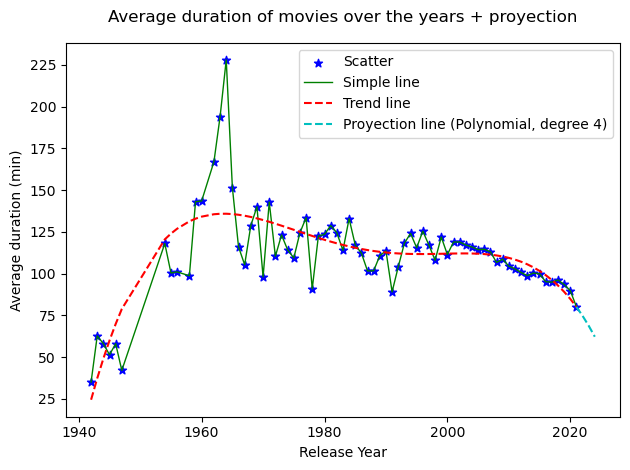

In [70]:
fig3

***Is this explainable by something like the genre of entertainment?***

##### An especific genre does not rule the trend. However, for the genres with more data values over the years, it is shown that data follows the trend line.

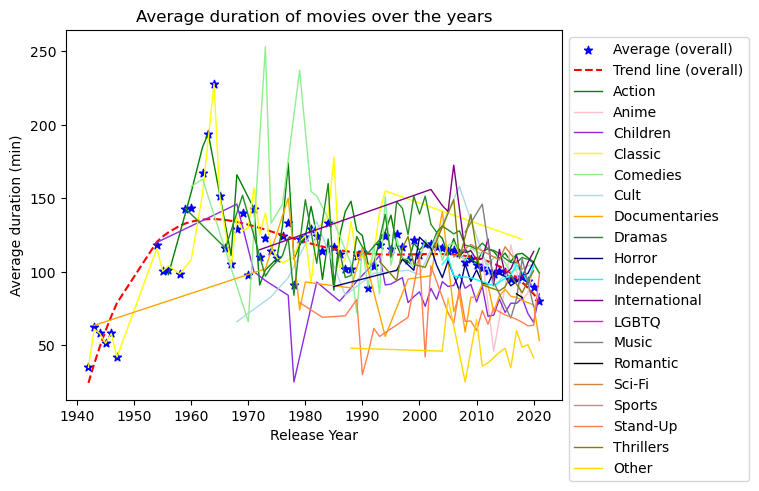

In [72]:
fig4

##### Example: Action, Drama

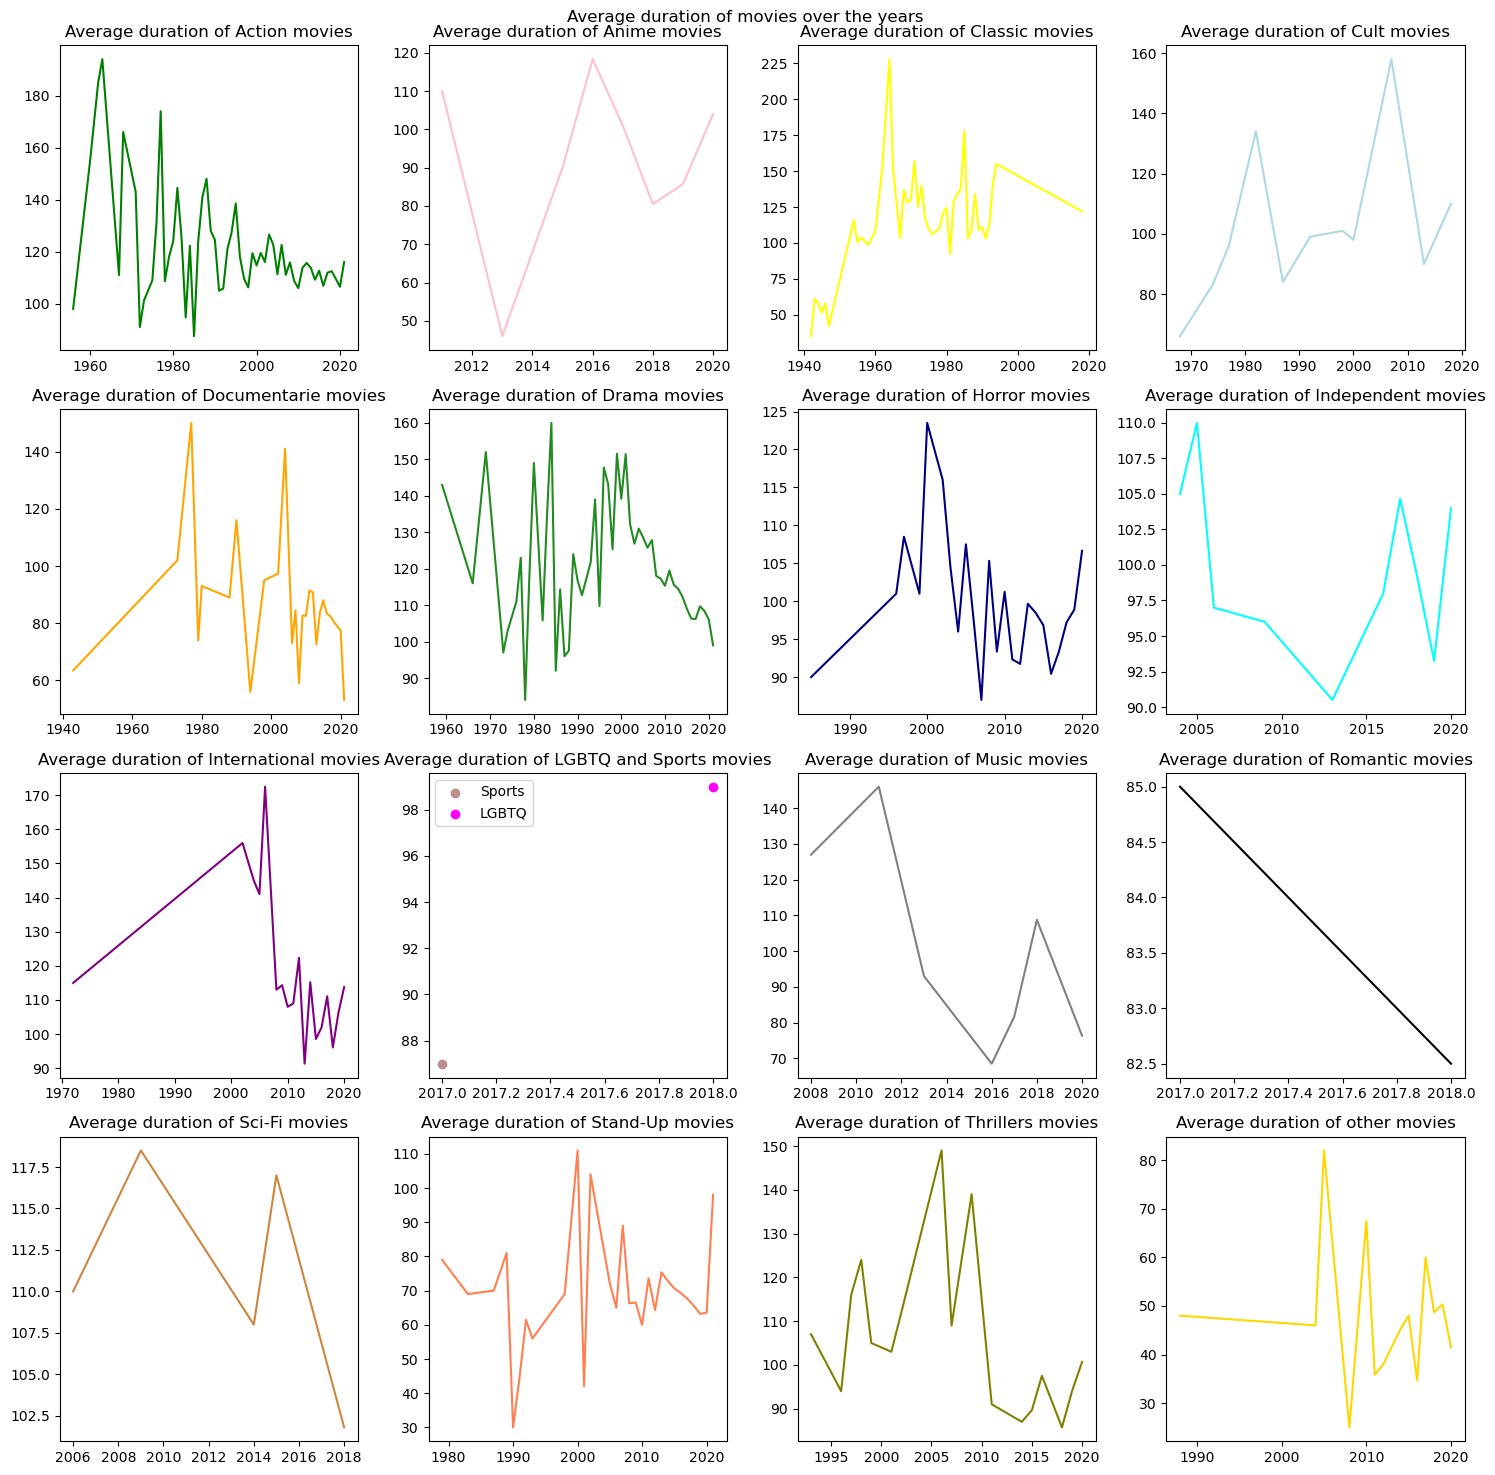

In [74]:
fig5